Intent Mining

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [2]:
texts = ['I need help with my order', "The arrived product is damaged", "How do I reset my password?"]
labels = ["Assistance", "Complaint", "Inquiry"]

In [3]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

In [4]:
classifier = RandomForestClassifier()
classifier.fit(X, labels)

RandomForestClassifier()

In [6]:
# new_text = "My shipment has delayed"
new_text = "Product is not good, I want a replacement"
new_X = vectorizer.transform([new_text])
predicted_intent = classifier.predict(new_X)
print(predicted_intent)

['Complaint']


In [7]:
new_text = "My shipment has delayed"
new_X = vectorizer.transform([new_text])
result = classifier.predict(new_X)
print(result)

['Inquiry']


Top Words

In [1]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

corpus = ['I love this product', 'This product is bad', 'I need help with this product']
top_words = get_top_n_words(corpus, n=5)
print(top_words)

[('this', 3), ('product', 3), ('love', 1), ('is', 1), ('bad', 1)]


WordCloud

(-0.5, 199.5, 199.5, -0.5)

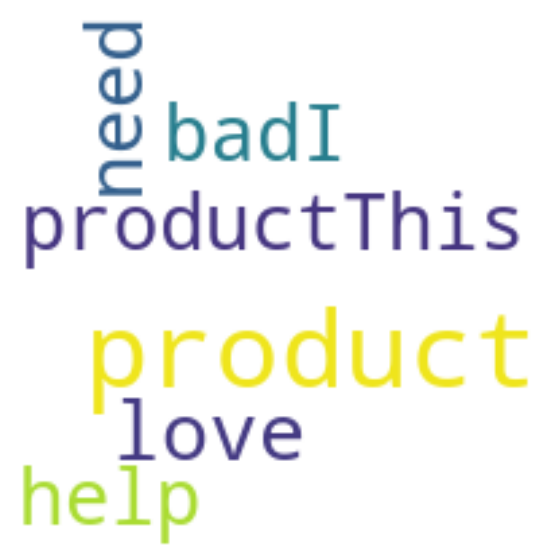

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ''.join(corpus)
wordcloud = WordCloud(width = 200, height=200, background_color='white').generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [13]:
import gensim
import plotly.express as px 
from gensim import corpora

def topic_classification(corpus, num_topics = 4):
    texts = [text.split() for text in corpus]
    dictionary = corpora.Dictionary(texts)
    doc_term_matrix = [dictionary.doc2bow(text) for text in texts]

    Lda = gensim.models.ldamodel.LdaModel
    lda_model = Lda(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=50)
    topics = lda_model.print_topics(num_words=5)
    for topic in topics:
        print(topic)

topic_classification(corpus)
intent_corpus = {"Assistance": 120, "Complaint": 80, "Inquiry": 50}
fig = px.pie(names=intent_corpus.keys(), values=intent_corpus.values(), title="Intent Distribution")
fig.show()

from fpdf import FPDF

def genrate_report(intent_counts, top_words, topics):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    pdf.set_font('Arial', 'B', 16)
    pdf.cell(200, 10, txt="Customer Service NLP Analysis Report", ln = True, align = 'C')
    pdf.ln(10)
    
    pdf.set_font("Arial", "B", 14)
    pdf.cell(200, 10, txt="Intent Distribution:", ln=True)
    pdf.set_font("Arial", size = 12)
    for intent, count in intent_corpus.items():
        pdf.cell(200, 10, txt=f"{intent}: {count}", ln=True)

(0, '0.100*"product" + 0.100*"this" + 0.100*"I" + 0.100*"love" + 0.100*"is"')
(1, '0.192*"product" + 0.192*"I" + 0.192*"this" + 0.192*"love" + 0.038*"is"')
(2, '0.147*"help" + 0.147*"with" + 0.147*"need" + 0.147*"I" + 0.147*"this"')
(3, '0.192*"product" + 0.192*"bad" + 0.192*"This" + 0.192*"is" + 0.038*"I"')
